In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

In [20]:
def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print("오차 행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}".format(accuracy,precision,recall))

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [14]:
#지금까지 피처를 가공한 내역을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록 함.
#데이터 전처리를 전체적으로 호출하는 함수는 transform_features()
from sklearn import preprocessing
#Null 처리 함수
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace =True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features =['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [15]:
#원본 데이터를 재로딩,데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('C:/Users/arwen/Documents/ESAA활동(21-2)/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

In [16]:
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df, test_size = 0.2, random_state =11)

In [29]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test,pred)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


C:\Users\arwen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##정밀도 재현율 트레이드오프

In [34]:
import numpy as np
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print("pred_proba()결과 shape: {0}".format(pred_proba.shape))
print("pred_proba array에서 앞 3개만 샘플로 추출 \n: ",pred_proba[:3])

#예측 확률 array와 예측 결괏값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
print("두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n",pred_proba_result[:3])

pred_proba()결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
:  [[0.4616653  0.5383347 ]
 [0.87862763 0.12137237]
 [0.87727002 0.12272998]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.4616653  0.5383347  1.        ]
 [0.87862763 0.12137237 0.        ]
 [0.87727002 0.12272998 0.        ]]


##Binarizer 클래스

In [37]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],[2,0,0],[0,1.1,1.2]]

#X의 개별 원소들이 threshold값보다 같거나 작으면 0을 , 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


x의 데이터 세트에서 1.1qhek 같거나 작으면 0, 크면 1로 변환됨.

In [42]:
#Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

#predict_proba()반환값의 두번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

In [52]:
pred_proba_1[:3]

array([[0.5383347 ],
       [0.12137237],
       [0.12272998]])

In [50]:
custom_predict[:3]

array([[1.],
       [0.],
       [0.]])

In [53]:
get_clf_eval(y_test,custom_predict)

오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869


In [54]:
#테스트를 수행할 모든 임곗값을 리스트 객체로 저장
thresholds= [0.4,0.45,0.50,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    #threshold list객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("임곗값:",custom_threshold)
        get_clf_eval(y_test,custom_predict)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차 행렬
[[99 19]
 [10 51]]
정확도: 0.8380, 정밀도: 0.7286, 재현율: 0.8361
임곗값: 0.45
오차 행렬
[[103  15]
 [ 12  49]]
정확도: 0.8492, 정밀도: 0.7656, 재현율: 0.8033
임곗값: 0.5
오차 행렬
[[104  14]
 [ 13  48]]
정확도: 0.8492, 정밀도: 0.7742, 재현율: 0.7869
임곗값: 0.55
오차 행렬
[[109   9]
 [ 15  46]]
정확도: 0.8659, 정밀도: 0.8364, 재현율: 0.7541
임곗값: 0.6
오차 행렬
[[112   6]
 [ 16  45]]
정확도: 0.8771, 정밀도: 0.8824, 재현율: 0.7377


##precision_recall_curve()<br>
입력 파라미터: y_true, proba_pred(positive 칼럼의 예측확률 배열)<br>
반환값: 정밀도, 재현율

In [65]:
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때의 예측확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일때의 예측확률은 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print("변환된 분류 결정 임곗값 배열의 shape:",thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임겠값을 15 step으로 추출
thr_index = np.arange(0,thresholds.shape[0],15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:',np.round(thresholds[thr_index],2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:',np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:',np.round(recalls[thr_index],3))

변환된 분류 결정 임곗값 배열의 shape: (143,)
샘플 추출을 위한 임곗값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.57 0.67 0.82 0.95]
샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


In [62]:
thr_index

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135])

In [63]:
thresholds.shape[0]

143

임계값이 증가할수록 정밀도값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있음

##precision_recall_curve()

In [66]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

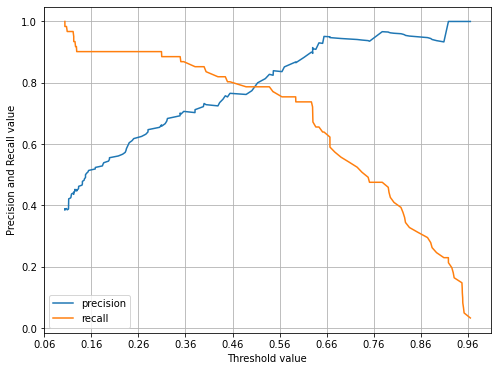

In [67]:
def precision_recall_curve_plot(y_test,pred_proba_c1):
    #threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='-',label='precision')
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recall')
    
    #threshold 값 X축의 scale을 0.1 단위로 변경
    start,end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    #x축, y축 label과 legen, 그리고 grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test,lr_clf.predict_proba(X_test)[:,1])